## Region: Normandie

- look at competition: profit/nonprofit, ratings, size (# of employees)
- possible to poach nurses from other homecare services
- study the population of elderly and the population of nurses

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [71]:
# constants
filename = 'dossier_complet.csv'
meta_filename = 'meta_dossier_complet.csv'
filepath = os.path.join('data', 'dossier_complet', filename)
filepath_meta = os.path.join('data', 'dossier_complet', meta_filename)

In [72]:
df = pd.read_csv(filepath, delimiter=';')
df_meta = pd.read_csv(filepath_meta, delimiter=';')

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/557334823.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/557334823.py:2: DtypeWarning:

Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [73]:
df_meta.head()

,COD_VAR,LIB_VAR,LIB_VAR_LONG,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR,THEME,SOURCE
0,P20_POP,Population en 2020 (princ),Population en 2020,NaN,NaN,NUM,7,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
1,P20_POP0014,Pop 0-14 ans en 2020 (princ),Nombre de personnes de 0 à 14 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
2,P20_POP1529,Pop 15-29 ans en 2020 (princ),Nombre de personnes de 15 à 29 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
3,P20_POP3044,Pop 30-44 ans en 2020 (princ),Nombre de personnes de 30 à 44 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
4,P20_POP4559,Pop 45-59 ans en 2020 (princ),Nombre de personnes de 45 à 59 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."


In [76]:
df['CODGEO'] = df['CODGEO'].astype(str)
filtered_data_normandy = df[df['CODGEO'].str.startswith(('14', '27', '50', '61', '76'))]

In [77]:
age_groups = ['P20_POP0014', 'P20_POP1529', 'P20_POP3044', 'P20_POP4559', 'P20_POP6074', 'P20_POP7589', 'P20_POP90P']
custom_labels = ['Ages 0-14', 'Ages 15-29', 'Ages 30-44', 'Ages 45-59', 'Ages 60-74', 'Ages 75-89', 'Ages 90+']


# function to generate population density for different age groups
def generate_density_df(df, age_groups):
    for age_group in age_groups:
        fraction_column = f'fraction_{age_group}'
        df[fraction_column] = df[age_group] / df['P20_POP']

    # Create a new DF with just the fractions
    fractions_df = df[[f'fraction_{age_group}' for age_group in age_groups]]

    return fractions_df


# function to generate pie chart for population density
def plot_density_df(fractions_df, age_groups, custom_labels):
    labels = custom_labels
    colors = plt.cm.Paired(range(len(age_groups)))

    fractions_df.mean().plot(kind='pie', labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Population Distribution by Age Group')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
    plt.show()

In [78]:
fractions_df = generate_density_df(filtered_data_normandy, age_groups)

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

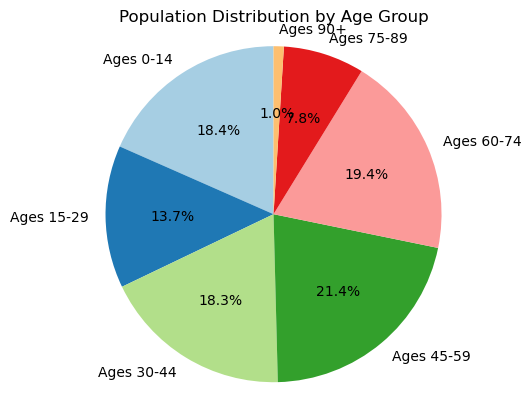

In [79]:
plot_density_df(fractions_df, age_groups, custom_labels)

* calculate density of ages 60+ per department (14, 50, 61)
* calculate density for select groups depending on the labels

In [80]:
df['CODGEO'] = df['CODGEO'].astype(str)
filtered_data_calvados = df[df['CODGEO'].str.startswith(('14'))]
filtered_data_manche = df[df['CODGEO'].str.startswith(('50'))]
filtered_data_orne = df[df['CODGEO'].str.startswith(('61'))]

In [81]:
fractions_df_calvados = generate_density_df(filtered_data_calvados, age_groups)
fractions_df_manche = generate_density_df(filtered_data_manche, age_groups)
fractions_df_orne = generate_density_df(filtered_data_orne, age_groups)

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

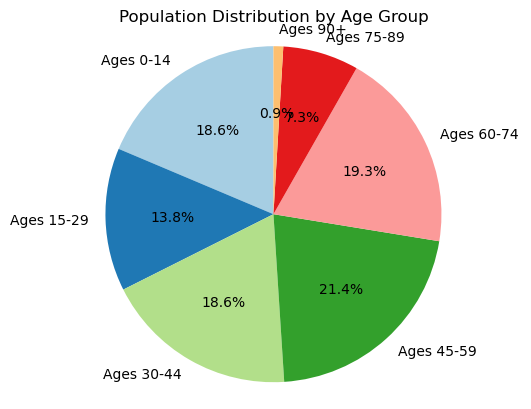

In [82]:
plot_density_df(fractions_df_calvados, age_groups, custom_labels)

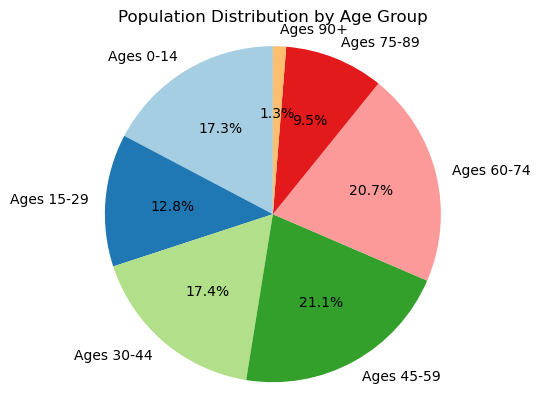

In [83]:
plot_density_df(fractions_df_manche, age_groups, custom_labels)

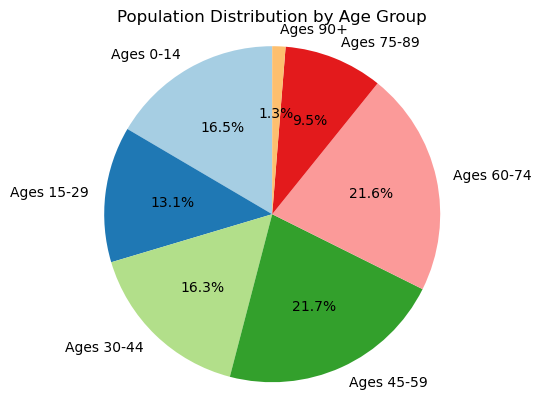

In [84]:
plot_density_df(fractions_df_orne, age_groups, custom_labels)

In [88]:
caen_codes = ['1405', '1406', '1407', '1408', '1409']
rouen_codes = ['7628', '7629', '7630']
havre_codes = ['7614', '7615', '7616', '7617', '7618', '7619']

# Filtering the DataFrame
filtered_df_caen = df[df['CODGEO'].isin(caen_codes)]
fractions_df_caen = generate_density_df(filtered_df_caen, age_groups)

filtered_df_rouen = df[df['CODGEO'].isin(rouen_codes)]
fractions_df_rouen = generate_density_df(filtered_df_rouen, age_groups)

filtered_df_havre = df[df['CODGEO'].isin(havre_codes)]
fractions_df_havre = generate_density_df(filtered_df_havre, age_groups)

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

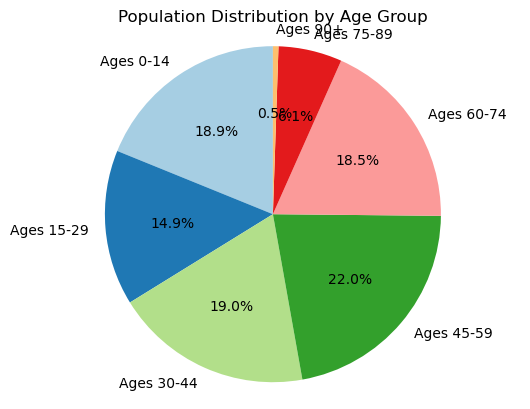

In [89]:
plot_density_df(fractions_df_caen, age_groups, custom_labels)

In [90]:
# create a plot by grouping the calvados, manche, orne arrondissments
# 4 arrondissements dans le département du Calvados
# Bayeux (141)
# Caen (142)
# Lisieux (143)
# Vire (144)

# 4 arrondissements dans le département de la Manche
# Avranches (501)
# Cherbourg (502)
# Coutances (503)
# Saint-Lô (504)

# 3 arrondissements dans le département de l'Orne
# Alençon (611)
# Argentan (612)
# Mortagne-au-Perche (613)

In [91]:
# create a plot that shows old people density for calvados, manche, and orne
# create subplot for each of the 3 departments (by arrondissement)
# optimization to find canton(s) with the most old people (let's try top 15 and bottom 5) for comparison sake

In [92]:
import pandas as pd
import plotly.express as px

# Define area code groups for arrondissments
calvados_area_codes = ['141', '142', '143', '144']
eure_area_codes = ['271', '272', '273']
la_manche_area_codes = ['501', '502', '503', '504']
orne_area_codes = ['611', '612', '613']
seine_maritime_area_codes = ['761', '762', '763']

selected_age_group='75+'

# Function to calculate density for a given DataFrame and area codes
def calculate_density(data_df, age_group='75+'):
    if age_group == '60+':
        columns = ['P20_POP6074', 'P20_POP7589', 'P20_POP90P']
    elif age_group == '75+':
        columns = ['P20_POP7589', 'P20_POP90P']
    elif age_group == '90+':
        columns = ['P20_POP90P']
    else:
        raise ValueError("Invalid age group selection")

    return data_df[columns].sum(axis=1) / data_df['P20_POP'] * 100

# Mapping area codes to names
area_code_names = {
    '141': 'Bayeux',
    '142': 'Caen',
    '143': 'Lisieux',
    '144': 'Vire',
    '271': 'Les Andelys',
    '272': 'Bernay',
    '273': 'Evreux',
    '501': 'Avranches',
    '502': 'Cherbourg',
    '503': 'Coutances',
    '504': 'Saint-Lô',
    '611': 'Alençon',
    '612': 'Argentan',
    '613': 'Mortagne-au-Perche',
    '761': 'Dieppe',
    '762': 'Le Havre',
    '763': 'Rouen'
}

# Create a DataFrame for the area codes and their densities
data = {
    'Area Code': calvados_area_codes + eure_area_codes + la_manche_area_codes + orne_area_codes + seine_maritime_area_codes,
    'Region': ['Calvados'] * len(calvados_area_codes) + ['Eure'] * len(eure_area_codes) + ['La Manche'] * len(la_manche_area_codes) + ['Orne'] * len(orne_area_codes) + ['Seine-Maritime'] * len(seine_maritime_area_codes),
    'Density (%)': []
}

# Calculate density for each area code and append to the DataFrame
for area_code in data['Area Code']:
    area_df = df[df['CODGEO'].astype(str).str.startswith(area_code)]
    area_density = calculate_density(area_df, selected_age_group)
    data['Density (%)'].append(area_density.mean())

# Create a DataFrame from the data dictionary
df_density = pd.DataFrame(data)

# Plot the density using Plotly Express
fig = px.bar(df_density, x='Area Code', y='Density (%)', color='Region', title=f'Density of People Ages {selected_age_group} in Different Arrondissements',
             labels={'Area Code': 'Arrondissement Code', 'Density (%)': 'Density (%)'})

# Update layout
fig.update_layout(
    xaxis=dict(tickangle=-45),
    xaxis_title='Area Codes',
    yaxis_title='Density (%)',
    legend_title='Regions',
    showlegend=True
)

# Show the figure
fig.show()


In [93]:
import pandas as pd

# Sample DataFrame (replace this with your actual data)
df = filtered_data_normandy.copy()

# Function to calculate density for a given DataFrame and area codes
def calculate_density(data_df):
    population_columns = ['P20_POP7589', 'P20_POP90P']
    
    # Check if the total population is zero or missing
    if data_df['P20_POP'].sum() == 0:
        return 0.0
    
    # Calculate density only if the total population is non-zero
    density = data_df[population_columns].sum(axis=1) / data_df['P20_POP'] * 100
    return density.mean()

# Function to find top 10 combinations of 5 consecutive communes with the greatest density of old people
def top_density_combinations(df):
    top_combinations = []
    top_densities = []

    for i in range(len(df) - 4):
        window_df = df.iloc[i:i+5]
        total_density = calculate_density(window_df).mean()
        combination = window_df['CODGEO'].tolist()

        # Insert the combination in sorted order
        insert_index = 0
        while insert_index < len(top_combinations) and total_density < top_densities[insert_index]:
            insert_index += 1

        top_combinations.insert(insert_index, combination)
        top_densities.insert(insert_index, total_density)

        # Keep only the top 10 combinations
        top_combinations = top_combinations[:10]
        top_densities = top_densities[:10]

    return top_combinations, top_densities

# Find the top 10 combinations
top_combinations, top_densities = top_density_combinations(df)

# Print the results
for i, (combination, density) in enumerate(zip(top_combinations, top_densities), 1):
    print(f"Top {i}: Communes {combination} with density {density:.2f}%")


Top 1: Communes ['50029', '50030', '50031', '50032', '50033'] with density 19.85%
Top 2: Communes ['50027', '50028', '50029', '50030', '50031'] with density 19.55%
Top 3: Communes ['5062', '5063', '5064', '5065', '5066'] with density 18.71%
Top 4: Communes ['50028', '50029', '50030', '50031', '50032'] with density 18.60%
Top 5: Communes ['5064', '5065', '5066', '5068', '5070'] with density 17.95%
Top 6: Communes ['6159', '6160', '6161', '6162', '6163'] with density 17.89%
Top 7: Communes ['6156', '6157', '6158', '6159', '6160'] with density 17.88%
Top 8: Communes ['50030', '50031', '50032', '50033', '50034'] with density 17.12%
Top 9: Communes ['50196', '50197', '50198', '50199', '50200'] with density 16.89%
Top 10: Communes ['50026', '50027', '50028', '50029', '50030'] with density 16.73%


In [108]:
## the optimization algorithm above needs to be redone
## need to calculate based on geographic distance between points
df_codes = pd.read_csv('data/code_postal_code_insee_2015public.csv', sep=";")

In [109]:
df_codes.head()

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REG,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_gps
0,"47.01437195152717, 0.3157041445234718","{""coordinates"": [[[0.308170023146216, 46.99992...",COMMUNE00000000000007635,196,37196,RICHELIEU,Commune simple,496727,6660564,496008,...,1.0,37,INDRE-ET-LOIRE,24,CENTRE-VAL DE LOIRE,RICHELIEU,37120.0,NaN,RICHELIEU,"47.014204963, 0.315762618"
1,"45.70528766721012, -0.7948440956985009","{""coordinates"": [[[-0.775148681528635, 45.6928...",COMMUNE00000000000007656,278,17278,PISANY,Commune simple,405884,6518380,404830,...,4.0,17,CHARENTE-MARITIME,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,PISANY,17600.0,NaN,PISANY,"45.705135232, -0.7947836140000001"
2,"45.172604816927425, 5.21545397586177","{""coordinates"": [[[5.225640565558654, 45.14621...",COMMUNE00000000000007839,359,38359,SAINT-ANTOINE-L'ABBAYE,Commune simple,874094,6455291,874041,...,1.0,38,ISERE,84,AUVERGNE-RHONE-ALPES,ST ANTOINE L ABBAYE,38160.0,NaN,ST ANTOINE L ABBAYE,"45.184624049, 5.212445683"
3,"48.89029057636954, 6.362501677178978","{""coordinates"": [[[6.355297806937861, 48.87526...",COMMUNE00000000000024101,559,57559,PUZIEUX,Commune simple,946921,6871102,946511,...,2.0,57,MOSELLE,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,PUZIEUX,57590.0,NaN,PUZIEUX,"48.8904713, 6.362597363"
4,"42.57697453656143, 2.2215799461228958","{""coordinates"": [[[2.188124670352984, 42.58754...",COMMUNE00000000000007703,128,66128,OREILLA,Commune simple,638645,6162454,636412,...,3.0,66,PYRENEES-ORIENTALES,76,LANGUEDOC-ROUSSILLON-MIDI-PYRENEES,OREILLA,66360.0,NaN,OREILLA,"42.576225276, 2.2224258470000002"


In [94]:
top_combinations, top_densities

([['50029', '50030', '50031', '50032', '50033'],
  ['50027', '50028', '50029', '50030', '50031'],
  ['5062', '5063', '5064', '5065', '5066'],
  ['50028', '50029', '50030', '50031', '50032'],
  ['5064', '5065', '5066', '5068', '5070'],
  ['6159', '6160', '6161', '6162', '6163'],
  ['6156', '6157', '6158', '6159', '6160'],
  ['50030', '50031', '50032', '50033', '50034'],
  ['50196', '50197', '50198', '50199', '50200'],
  ['50026', '50027', '50028', '50029', '50030']],
 [19.851270369092013,
  19.54704024763838,
  18.709109677628824,
  18.603734463713245,
  17.95150418899967,
  17.89176975139147,
  17.877210362791118,
  17.12309273427205,
  16.89319666534732,
  16.726017844354477])

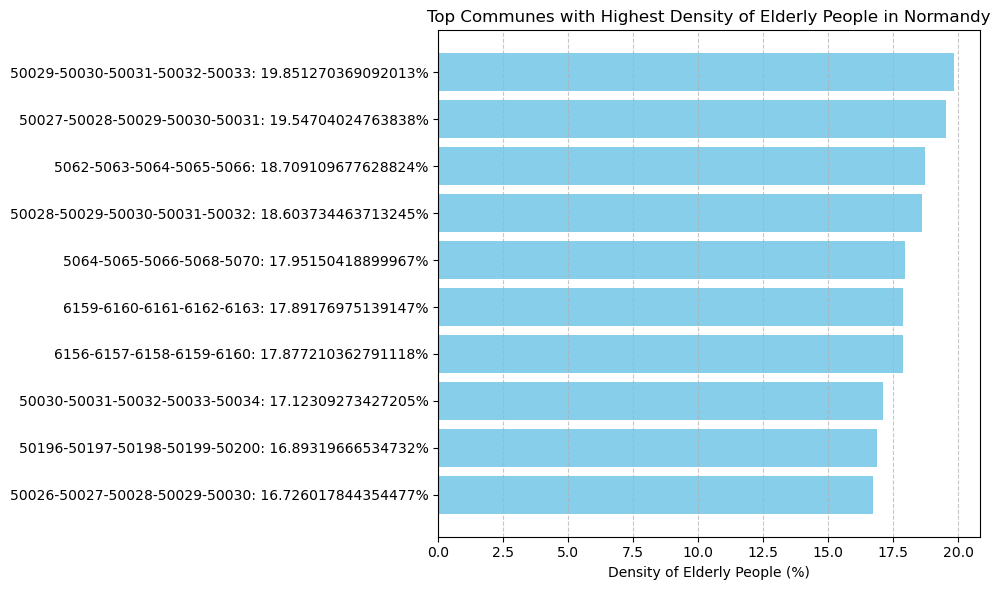

In [95]:
import matplotlib.pyplot as plt

# Top communes and their densities
top_communes = top_combinations
densities = top_densities

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_communes)), densities, color='skyblue')
plt.yticks(range(len(top_communes)), [f"{'-'.join(commune)}: {density}%" for commune, density in zip(top_communes, densities)])
plt.xlabel('Density of Elderly People (%)')
plt.title('Top Communes with Highest Density of Elderly People in Normandy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest density at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [105]:
# Flatten the list of lists and convert to set to get unique values
unique_area_codes = set(code for sublist in top_communes for code in sublist)

# Convert the set back to a list if necessary
unique_area_codes_list = list(unique_area_codes)

In [106]:
df_codes = pd.read_csv('data/code_postal_code_insee_2015public.csv', sep=";")

In [107]:
import pandas as pd
import plotly.express as px

# Flatten the list of lists and convert to set to get unique values
unique_area_codes = set(code for sublist in top_communes for code in sublist)

# Convert the set back to a list if necessary
unique_area_codes_list = list(unique_area_codes)

# Load the dataset containing the coordinates
df_codes = pd.read_csv('data/code_postal_code_insee_2015public.csv', sep=";")

# Filter the dataset to include only the selected area codes
df_codes_top = df_codes[df_codes['INSEE_COM'].isin(unique_area_codes_list)]

# Split 'Geo Point' column into separate latitude and longitude columns
df_codes_top[['latitude', 'longitude']] = df_codes_top['Geo Point'].str.split(', ', expand=True).astype(float)

# Create a scatter map plot using Plotly Express
fig = px.scatter_mapbox(df_codes_top, lat="latitude", lon="longitude", 
                        hover_name="NOM_COM", hover_data=["CODE_COM"],
                        zoom=8, height=600)

# Customize the map layout
fig.update_layout(mapbox_style="carto-positron",
                  margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()


/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/2190508749.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/2190508749.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

